# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [4]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t', index_col="order_id")

### Step 4. See the first 10 entries

In [5]:
chipo.head(10)

,quantity,item_name,choice_description,item_price
order_id,,,,
1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,Izze,[Clementine],$3.39
1,1,Nantucket Nectar,[Apple],$3.39
1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
3,1,Side of Chips,NaN,$1.69
4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25


### Step 5. Create a histogram of the top 5 items bought

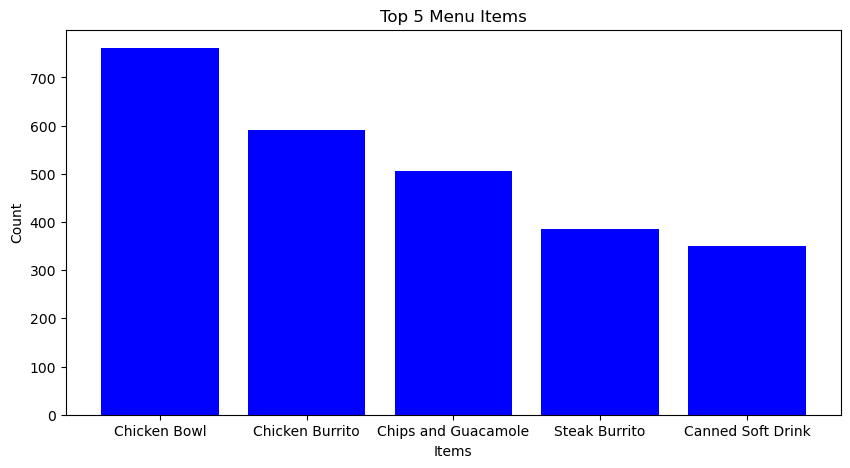

In [12]:
plt.figure(figsize=(10,5))
items_quan = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(5)
plt.bar(items_quan.index, items_quan.values, color='blue')

plt.xlabel('Items')
plt.ylabel('Count')
plt.title('Top 5 Menu Items')

plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

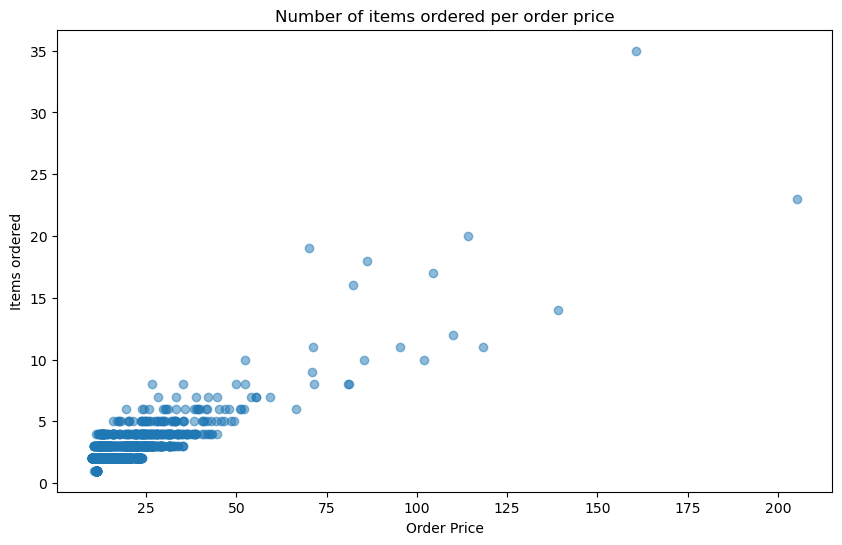

In [19]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

orders = chipo.groupby('order_id').sum()

plt.figure(figsize=(10, 6))
plt.scatter(orders['item_price'], orders['quantity'], alpha=0.5)

plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')

plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

How does the distribution of revenue per order vary across different orders in the Chipotle dataset?

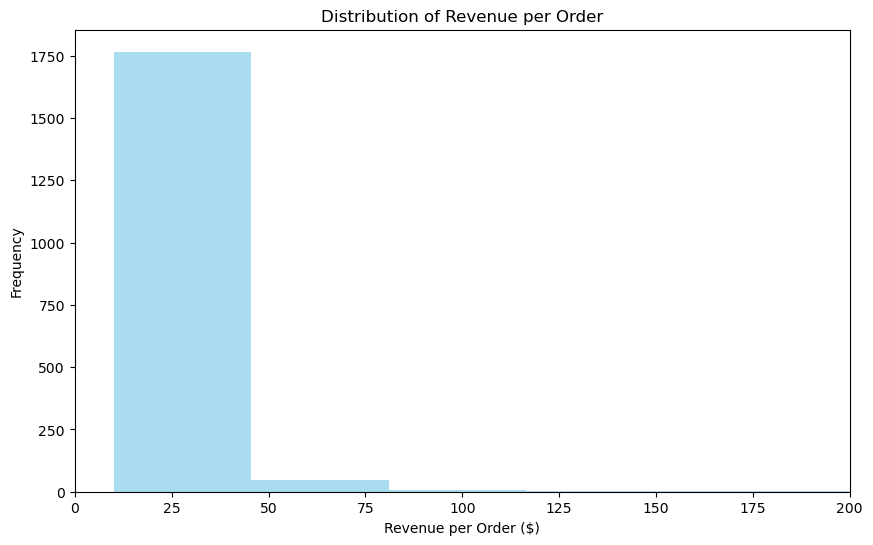

In [22]:

chipo['revenue'] = chipo['quantity'] * chipo['item_price']

revenue_per_order = chipo.groupby('order_id')['revenue'].sum()

plt.figure(figsize=(10, 6))
plt.hist(revenue_per_order, bins=30, color='skyblue', alpha=0.7)

plt.title('Distribution of Revenue per Order')
plt.xlabel('Revenue per Order ($)')
plt.ylabel('Frequency')

plt.xlim(0,200)

plt.show()